In [1]:
import os
import h5py as h5
import numpy as np
import seaborn as sns
import pandas as pd
import glob
import scipy.stats as st
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.misc import imshow
#Classifiers dependencies
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



In [2]:
import cv2

In [3]:
from PIL import Image
import math
#entropy
from skimage.feature import greycomatrix
#for energy
from pywt import dwt2
import sys

In [4]:
class Patient(object):
    PID = ""
    image=""
    label=""
    tumorBorder=""
    tumorMask=""
    
    def __init__(self, PID, image, label,tumorBorder,tumorMask):
        self.PID = PID
        self.image = image
        self.label = label
        self.tumorBorder=tumorBorder
        self.tumorMask=tumorMask

In [5]:
f=h5.File("1.mat","r")
list(f['/cjdata'].keys())

p=Patient('','','','','')
p.image=np.mat(f['/cjdata/image'])
p.PID=np.array(f['/cjdata/PID'])
p.label=np.array(f['/cjdata/label'])
p.tumorBorder=np.mat(f['/cjdata/tumorBorder'])
p.tumorMask=np.mat(f['/cjdata/tumorMask'])

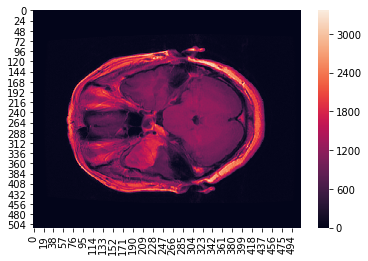

In [6]:
sns.heatmap(p.image)

In [7]:
f

<HDF5 file "1.mat" (mode r)>

In [8]:
f=[]
file_path="C:/Users/Sandeep Chinnareddy/Desktop/4th year - second semester/BIO Project DOP/BrainTumorClassification-master/Data"

for i in range(3064):
     f.append(h5.File(os.path.join(file_path,str(i+1)+".mat"),'a'))

In [9]:
f[0].name

'/'

In [10]:
list(f[0]['/cjdata'].keys())

['PID', 'image', 'label', 'tumorBorder', 'tumorMask']

In [11]:
f

[<HDF5 file "1.mat" (mode r+)>,
 <HDF5 file "2.mat" (mode r+)>,
 <HDF5 file "3.mat" (mode r+)>,
 <HDF5 file "4.mat" (mode r+)>,
 <HDF5 file "5.mat" (mode r+)>,
 <HDF5 file "6.mat" (mode r+)>,
 <HDF5 file "7.mat" (mode r+)>,
 <HDF5 file "8.mat" (mode r+)>,
 <HDF5 file "9.mat" (mode r+)>,
 <HDF5 file "10.mat" (mode r+)>,
 <HDF5 file "11.mat" (mode r+)>,
 <HDF5 file "12.mat" (mode r+)>,
 <HDF5 file "13.mat" (mode r+)>,
 <HDF5 file "14.mat" (mode r+)>,
 <HDF5 file "15.mat" (mode r+)>,
 <HDF5 file "16.mat" (mode r+)>,
 <HDF5 file "17.mat" (mode r+)>,
 <HDF5 file "18.mat" (mode r+)>,
 <HDF5 file "19.mat" (mode r+)>,
 <HDF5 file "20.mat" (mode r+)>,
 <HDF5 file "21.mat" (mode r+)>,
 <HDF5 file "22.mat" (mode r+)>,
 <HDF5 file "23.mat" (mode r+)>,
 <HDF5 file "24.mat" (mode r+)>,
 <HDF5 file "25.mat" (mode r+)>,
 <HDF5 file "26.mat" (mode r+)>,
 <HDF5 file "27.mat" (mode r+)>,
 <HDF5 file "28.mat" (mode r+)>,
 <HDF5 file "29.mat" (mode r+)>,
 <HDF5 file "30.mat" (mode r+)>,
 <HDF5 file "31.mat

In [12]:
d={'PID':[],
   'image':[],
   'label':[],
   'tumorBorder':[],
   'tumorMask':[]}

In [13]:
for i in range(0, 3064):
    d['PID'].append(np.array(f[i]['/cjdata/PID']))
    d['image'].append(np.array(f[i]['/cjdata/image']))
    d['label'].append(f[i]['/cjdata/label'][0][0])
    d['tumorBorder'].append(f[i]['/cjdata/tumorBorder'][0])
    d['tumorMask'].append(f[i]['/cjdata/tumorMask'][0])

In [14]:
columns=['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
Patient_data=pd.DataFrame(list(d.values()),columns)       
         
Patient_data=Patient_data.transpose()

In [15]:
Patient_data.to_csv(os.path.join(file_path,"BrainTumor_Data"))

In [16]:
Patient_data

,PID,image,label,tumorBorder,tumorMask
0,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[267.6152450090744, 231.37568058076226, 277.83...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[319.33101045296166, 153.42160278745644, 302.3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[280.08362369337976, 173.0452961672474, 273.83...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[279.191637630662, 237.26829268292684, 293.463...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[286.32752613240416, 231.9163763066202, 297.03...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,"[[49], [48], [48], [53], [55], [50]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[285.4355400696864, 184.6411149825784, 273.839...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,"[[49], [48], [48], [53], [55], [50]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[257.7839721254355, 222.10452961672473, 264.02...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,"[[49], [48], [48], [53], [55], [50]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[289.89547038327527, 193.5609756097561, 296.13...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,"[[49], [48], [49], [48], [49], [54]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[240.83623693379792, 257.7839721254355, 232.80...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,"[[49], [48], [49], [48], [49], [54]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[248.86411149825784, 256.89198606271776, 238.1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Calculation of the proper dataset was done above

In [17]:
path = 'C:\\Users\\Sandeep Chinnareddy\\Desktop\\4th year - second semester\\BIO Project DOP\\BrainTumorClassification-master\\Data\\*.mat'   
files=glob.glob(path)

In [18]:
f

[<HDF5 file "1.mat" (mode r+)>,
 <HDF5 file "2.mat" (mode r+)>,
 <HDF5 file "3.mat" (mode r+)>,
 <HDF5 file "4.mat" (mode r+)>,
 <HDF5 file "5.mat" (mode r+)>,
 <HDF5 file "6.mat" (mode r+)>,
 <HDF5 file "7.mat" (mode r+)>,
 <HDF5 file "8.mat" (mode r+)>,
 <HDF5 file "9.mat" (mode r+)>,
 <HDF5 file "10.mat" (mode r+)>,
 <HDF5 file "11.mat" (mode r+)>,
 <HDF5 file "12.mat" (mode r+)>,
 <HDF5 file "13.mat" (mode r+)>,
 <HDF5 file "14.mat" (mode r+)>,
 <HDF5 file "15.mat" (mode r+)>,
 <HDF5 file "16.mat" (mode r+)>,
 <HDF5 file "17.mat" (mode r+)>,
 <HDF5 file "18.mat" (mode r+)>,
 <HDF5 file "19.mat" (mode r+)>,
 <HDF5 file "20.mat" (mode r+)>,
 <HDF5 file "21.mat" (mode r+)>,
 <HDF5 file "22.mat" (mode r+)>,
 <HDF5 file "23.mat" (mode r+)>,
 <HDF5 file "24.mat" (mode r+)>,
 <HDF5 file "25.mat" (mode r+)>,
 <HDF5 file "26.mat" (mode r+)>,
 <HDF5 file "27.mat" (mode r+)>,
 <HDF5 file "28.mat" (mode r+)>,
 <HDF5 file "29.mat" (mode r+)>,
 <HDF5 file "30.mat" (mode r+)>,
 <HDF5 file "31.mat

In [19]:
files

['C:\\Users\\Sandeep Chinnareddy\\Desktop\\4th year - second semester\\BIO Project DOP\\BrainTumorClassification-master\\Data\\1.mat',
 'C:\\Users\\Sandeep Chinnareddy\\Desktop\\4th year - second semester\\BIO Project DOP\\BrainTumorClassification-master\\Data\\10.mat',
 'C:\\Users\\Sandeep Chinnareddy\\Desktop\\4th year - second semester\\BIO Project DOP\\BrainTumorClassification-master\\Data\\100.mat',
 'C:\\Users\\Sandeep Chinnareddy\\Desktop\\4th year - second semester\\BIO Project DOP\\BrainTumorClassification-master\\Data\\1000.mat',
 'C:\\Users\\Sandeep Chinnareddy\\Desktop\\4th year - second semester\\BIO Project DOP\\BrainTumorClassification-master\\Data\\1001.mat',
 'C:\\Users\\Sandeep Chinnareddy\\Desktop\\4th year - second semester\\BIO Project DOP\\BrainTumorClassification-master\\Data\\1002.mat',
 'C:\\Users\\Sandeep Chinnareddy\\Desktop\\4th year - second semester\\BIO Project DOP\\BrainTumorClassification-master\\Data\\1003.mat',
 'C:\\Users\\Sandeep Chinnareddy\\Deskto

In [20]:
df = pd.DataFrame(columns=[])
for file in files:
    f=h5.File(file,'r')
    list(f.items())
    list(f['/cjdata'].keys())
    p=Patient('','','','','')
    p.image=np.mat(f['/cjdata/image'])
    p.PID=np.array(f['/cjdata/PID'])
    p.label=np.array(f['/cjdata/label'])
    p.tumorBorder=np.mat(f['/cjdata/tumorBorder'])
    p.tumorMask=np.mat(f['/cjdata/tumorMask'])
    
    img=p.image
    img1=p.tumorMask
    #print(plt.imshow(img))  #to get image
    #print(plt.imshow(img1)) 
   
    a=img1.std()   #Standard Deviation
    b=img1.mean()  #mean
    c=img1.var()   #variance
    d=p.label
    
    glcm = np.squeeze(greycomatrix(img1, distances=[1], 
                               angles=[0], symmetric=True, 
                               normed=True))
    f = -np.sum(glcm*np.log2(glcm + (glcm==0)))#Entropy
    
    _, (cH, cV, cD) = dwt2(img1.T, 'db1')
    g= (cH**2 + cV**2 + cD**2).sum()/img1.size#Energy
    
    df = df.append({'Mean': b,'Standard Deviation': a, 'variance':c, 'Entropy': f, 'Energy':g}, ignore_index=True)


In [21]:
df

,Energy,Entropy,Mean,Standard Deviation,variance
0,0.000316,0.135311,0.017429,0.130865,0.017126
1,0.000237,0.112373,0.014141,0.118072,0.013941
2,0.000197,0.079722,0.009319,0.096086,0.009232
3,0.000126,0.056048,0.005882,0.076470,0.005848
4,0.000188,0.062349,0.006702,0.081594,0.006658
5,0.000141,0.051663,0.005318,0.072728,0.005289
6,0.000190,0.058693,0.006168,0.078296,0.006130
7,0.000127,0.053418,0.005558,0.074345,0.005527
8,0.000137,0.044604,0.004448,0.066544,0.004428
9,0.000172,0.056103,0.005829,0.076124,0.005795


In [22]:
f

0.05371386889236192

In [23]:
df1 = Patient_data

In [24]:
df1

,PID,image,label,tumorBorder,tumorMask
0,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[267.6152450090744, 231.37568058076226, 277.83...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[319.33101045296166, 153.42160278745644, 302.3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[280.08362369337976, 173.0452961672474, 273.83...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[279.191637630662, 237.26829268292684, 293.463...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[286.32752613240416, 231.9163763066202, 297.03...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,"[[49], [48], [48], [53], [55], [50]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[285.4355400696864, 184.6411149825784, 273.839...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,"[[49], [48], [48], [53], [55], [50]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[257.7839721254355, 222.10452961672473, 264.02...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,"[[49], [48], [48], [53], [55], [50]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[289.89547038327527, 193.5609756097561, 296.13...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,"[[49], [48], [49], [48], [49], [54]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[240.83623693379792, 257.7839721254355, 232.80...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,"[[49], [48], [49], [48], [49], [54]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[248.86411149825784, 256.89198606271776, 238.1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [25]:
df1 = pd.concat([df1, df], axis=1, sort=False) #, axis=1

In [26]:
df1

,PID,image,label,tumorBorder,tumorMask,Energy,Entropy,Mean,Standard Deviation,variance
0,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[267.6152450090744, 231.37568058076226, 277.83...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000316,0.135311,0.017429,0.130865,0.017126
1,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[319.33101045296166, 153.42160278745644, 302.3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000237,0.112373,0.014141,0.118072,0.013941
2,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[280.08362369337976, 173.0452961672474, 273.83...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000197,0.079722,0.009319,0.096086,0.009232
3,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[279.191637630662, 237.26829268292684, 293.463...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000126,0.056048,0.005882,0.076470,0.005848
4,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[286.32752613240416, 231.9163763066202, 297.03...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000188,0.062349,0.006702,0.081594,0.006658
5,"[[49], [48], [48], [53], [55], [50]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[285.4355400696864, 184.6411149825784, 273.839...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000141,0.051663,0.005318,0.072728,0.005289
6,"[[49], [48], [48], [53], [55], [50]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[257.7839721254355, 222.10452961672473, 264.02...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000190,0.058693,0.006168,0.078296,0.006130
7,"[[49], [48], [48], [53], [55], [50]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[289.89547038327527, 193.5609756097561, 296.13...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000127,0.053418,0.005558,0.074345,0.005527
8,"[[49], [48], [49], [48], [49], [54]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[240.83623693379792, 257.7839721254355, 232.80...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000137,0.044604,0.004448,0.066544,0.004428
9,"[[49], [48], [49], [48], [49], [54]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[248.86411149825784, 256.89198606271776, 238.1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000172,0.056103,0.005829,0.076124,0.005795


In [27]:
df.skew()

Energy                1.111696
Entropy               1.002153
Mean                  1.460060
Standard Deviation    0.564344
variance              1.367698
dtype: float64

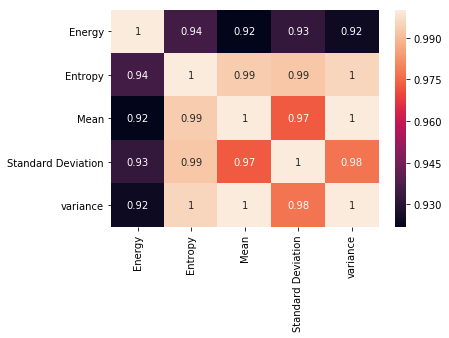

In [28]:
cm = df.corr()
sns.heatmap(cm, annot=True, yticklabels=df.columns, xticklabels=df.columns)

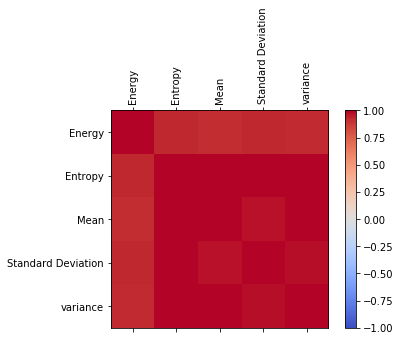

In [29]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [30]:
df1 = df1.drop('label',axis=1)
df_x=df1.iloc[:,4:9]
df_y=Patient_data.iloc[:,2:3]
df_y=df_y.astype('int')

In [31]:
x_train, x_test, y_train, y_test= train_test_split(df_x,df_y,test_size=.2,random_state=4)

In [32]:
df1

,PID,image,tumorBorder,tumorMask,Energy,Entropy,Mean,Standard Deviation,variance
0,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[267.6152450090744, 231.37568058076226, 277.83...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000316,0.135311,0.017429,0.130865,0.017126
1,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[319.33101045296166, 153.42160278745644, 302.3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000237,0.112373,0.014141,0.118072,0.013941
2,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[280.08362369337976, 173.0452961672474, 273.83...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000197,0.079722,0.009319,0.096086,0.009232
3,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[279.191637630662, 237.26829268292684, 293.463...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000126,0.056048,0.005882,0.076470,0.005848
4,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[286.32752613240416, 231.9163763066202, 297.03...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000188,0.062349,0.006702,0.081594,0.006658
5,"[[49], [48], [48], [53], [55], [50]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[285.4355400696864, 184.6411149825784, 273.839...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000141,0.051663,0.005318,0.072728,0.005289
6,"[[49], [48], [48], [53], [55], [50]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[257.7839721254355, 222.10452961672473, 264.02...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000190,0.058693,0.006168,0.078296,0.006130
7,"[[49], [48], [48], [53], [55], [50]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[289.89547038327527, 193.5609756097561, 296.13...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000127,0.053418,0.005558,0.074345,0.005527
8,"[[49], [48], [49], [48], [49], [54]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[240.83623693379792, 257.7839721254355, 232.80...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000137,0.044604,0.004448,0.066544,0.004428
9,"[[49], [48], [49], [48], [49], [54]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[248.86411149825784, 256.89198606271776, 238.1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000172,0.056103,0.005829,0.076124,0.005795


In [33]:
x_train

,Energy,Entropy,Mean,Standard Deviation,variance
216,0.000190,0.072913,0.008236,0.090378,0.008168
236,0.000258,0.112012,0.014050,0.117695,0.013852
347,0.000188,0.086355,0.009975,0.099378,0.009876
1107,0.000285,0.109923,0.013500,0.115403,0.013318
2983,0.000131,0.049086,0.005024,0.070702,0.004999
2726,0.000168,0.068658,0.007591,0.086796,0.007534
870,0.000187,0.065951,0.007286,0.085047,0.007233
2043,0.000277,0.161641,0.022354,0.147832,0.021854
597,0.000150,0.049572,0.004986,0.070434,0.004961
1879,0.000274,0.157950,0.021671,0.145608,0.021202


In [34]:
y_train

,label
216,1
236,1
347,1
1107,3
2983,2
2726,2
870,2
2043,2
597,1
1879,2


In [35]:
df_x

,Energy,Entropy,Mean,Standard Deviation,variance
0,0.000316,0.135311,0.017429,0.130865,0.017126
1,0.000237,0.112373,0.014141,0.118072,0.013941
2,0.000197,0.079722,0.009319,0.096086,0.009232
3,0.000126,0.056048,0.005882,0.076470,0.005848
4,0.000188,0.062349,0.006702,0.081594,0.006658
5,0.000141,0.051663,0.005318,0.072728,0.005289
6,0.000190,0.058693,0.006168,0.078296,0.006130
7,0.000127,0.053418,0.005558,0.074345,0.005527
8,0.000137,0.044604,0.004448,0.066544,0.004428
9,0.000172,0.056103,0.005829,0.076124,0.005795


In [73]:
#classifier = KNeighborsClassifier(n_neighbors=3)                  #KNN                  acc= 88.55%

#classifier = svm.SVC(gamma=0.001, C=100)#SVM                   acc=90.04%

#classifier = tree.DecisionTreeClassifier()                      #decision tree         acc=84%

#classifier = GaussianNB()                                      #naive bayes           acc 85.57

#classifier = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)   #Random forest      acc=88.06%

classifier=MLPClassifier(activation='relu',solver='sgd',hidden_layer_sizes=(100,150),random_state=1,max_iter=2000) #MLP acc=90.04%
#nn.fit(x_train,y_train.values.ravel())

In [74]:
classifier.fit(x_train,y_train)

C:\Users\Sandeep Chinnareddy\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 150), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [75]:
classifier.score(x_test,y_test)

0.45840130505709625

In [76]:
test=x_test.iloc[1]
test.Energy=.5
test.Entropy=.5
test['Standard Deviation']=.5
test.Mean=.5
test=[test]

In [77]:
classifier.predict(test)

array([2])

In [78]:
y_pred = classifier.predict(x_test)

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0 154   0]
 [  0 281   0]
 [  0 178   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       154
           2       0.46      1.00      0.63       281
           3       0.00      0.00      0.00       178

   micro avg       0.46      0.46      0.46       613
   macro avg       0.15      0.33      0.21       613
weighted avg       0.21      0.46      0.29       613



C:\Users\Sandeep Chinnareddy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sandeep Chinnareddy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sandeep Chinnareddy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
